## 🚢 Question 1 🚢
>
>Read the dataset correctly using `pandas`, using an appropriate column as index. 
>
>What is the PassengerId of "Mr. Robert William Norman"?

In [24]:
import pandas as pd
titanic = pd.read_csv("dataframe/titanic.csv")
titanic = titanic.set_index('PassengerId') # We chose 'PassengerId' as our index column, because it start with 1 and easier for us to get reference
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [25]:
rob_passengerid = int(titanic.loc[titanic["Name"]=="Mr. Robert William Norman"].index[0]) # .loc could not directly get index('passengerID')

print("The PassengerId of Mr. Robert William Norman is",rob_passengerid)

The PassengerId of Mr. Robert William Norman is 235


## 🚢 Question 2 🚢
>Compute **the percentage of survivors out of total number of passengers** and **the percentage of men and women out of total number of passengers**. 
>
>Paste the answers below.
>
> Notes: Survived 0-No, 1-Yes

In [26]:
percentage_of_total_survivor = round(titanic["Survived"].sum()/len(titanic),2)# because 1 is survived and 0 is not survived, so the total survived is the sum of ["Survived"]

print("The percentage of survivier out of total passenger is",percentage_of_total_survivor*100,"%")

The percentage of survivier out of total passenger is 38.0 %


In [48]:
# to make it easier to check the result, below percentage cacluation would round 2 decimal

round(titanic.groupby("Sex").agg({"Name":"count"})/len(titanic),2) 

# first, we group by the same, with agg function to count the mumber of passenger according to gender, then we divided each of output with the total number of passenger

,Name
Sex,
female,0.35
male,0.65


## 🚢 Question 3 🚢
>Compute the **percentage of survivors by sex**
>(i.e. the percentage of male passengers that survived and female passengers that survived) 
>
>and **the sex distribution of survivors** (i.e. percentage of survivors that were men and percentage of survivors that were women). Paste the answers below.

In [28]:
# The Percentage of Survivors by Sex
round(titanic.groupby("Sex")[["Survived"]].mean(),2)

,Survived
Sex,
female,0.74
male,0.19


In [29]:
# The Sex Distribution of Survivors

round(titanic.loc[titanic["Survived"]==1].groupby("Sex").agg({"Survived":"sum"})/titanic["Survived"].sum(),2)

# 1. we first use .loc to indexing survior of titanic
# 2. we group by them by Sex, and calculate the number of survivor based on sex
# 3. we divided them by the number of survivor by using the sum of titanic["Survived"],because 1 is the survived.

,Survived
Sex,
female,0.68
male,0.32


## 🚢 Question 4 🚢
>Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.
>One possible option:

_ |Survived |Not Survived
:-:|:-|-:
Male|Male & Survived|Male & Not Survived
Female|Female & Survived|Female & Not Survived

In [30]:
titanic_df = round(titanic.pivot_table(
    index = "Sex",
    columns="Survived",
    values= "Name",
    aggfunc = "count")/len(titanic),2)

titanic_df

Survived,0,1
Sex,,
female,0.09,0.26
male,0.53,0.12


## 🚢 Question 5 🚢
> Display in a DataFrame the probability of survival/not survival of all combinations of sex and class.
>
> One possible option:

_ |Pclass|Survived |Not Survived
:-:|:-|-:|-: 
Male|1|Male & Survived & Class 1|Male & Not Survived & Class 1
Male|2|Male & Survived & Class 2|Male & Not Survived & Class 2
Male|3|Male & Survived & Class 3|Male & Not Survived & Class 3
Female|1|Female & Survived & Class 1|Female & Not Survived & Class 1
Female|2|Female & Survived & Class 2|Female & Not Survived & Class 2
Female|3|Female & Survived & Class 3|Female & Not Survived & Class 3

In [31]:
probability_of_survival = round(titanic.pivot_table(
    index=["Sex","Pclass"], 
    columns='Survived',
    values = "Name",
    aggfunc="count")/len(titanic),3)

probability_of_survival

Survived           0      1
Sex    Pclass              
female 1       0.003  0.102
       2       0.007  0.079
       3       0.081  0.081
male   1       0.086  0.051
       2       0.102  0.019
       3       0.337  0.053

# Part II More Insights on the Data🚢
## Question 6

>Present 3 insights about the dataset, each of them relating at least 3 different variables, and support them by code and numbers. Possible examples:
>
>-"Men aged less than 18 were more/less likely to survive than the average passenger" (Sex, Age, Survival)
?
>
>-"Women with no siblings or spouses paid on average a cheaper/pricier ticket than the average woman" (Sex, SibSp, Fare)
>
>-"Men with a title other than Mr. were more/less likely to have a known (i.e. non-missing) cabin than the average man" (Sex, Name, Cabin)

In [32]:
titanic.info() # Check the columns, we could each column how many value missing 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 🚢Insight 1 - Age, `Title` from Name , Fare
>
>Goal: Try to understand if Age would matter among "Mr"& "Miss" when they paid their fare

#### Conclusion⭐️
**<span style='background :#03CEA4' > From Title "Miss" and "Mr" as the age go higher, they would paid more fare in average</span>**
>>
>>> As passengers with the titles “Miss." and "Mr." grew older, they had more purchasing power and spent more on their ticket fare in average i.e.  (Miss [0,18] is _33.4_ vs _78.0_ Miss [58,80]). 

>>> At the same time, the average purchasing power of all passengers with the title Miss was 2.1 time higher than the average purchasing power of passengers with the title Mr. (58.4 vs 27.4).


In [33]:
# First we want to clean Age Data, we first use the mean of age to fill the missing value in age column and then divided them into four groups

titanic["Age"].isnull().sum() #177 value is missing

titanic["Age"] = titanic['Age'].fillna(titanic["Age"].mean()) 
#fill missing value with average age

titanic["Age_Range"] = pd.cut(titanic["Age"], [0, 18, 38, 58, 80])
# age range divided into (0,18],(18,38],(38,58],(58,80]

#titanic

In [34]:
# Titale from Name, extract title from name
titile = titanic["Name"].str.split(".", n = -1, expand = True)  # split the name from their title 
#.str.split -->  n= -1 will be interpreted as return all splits
#.str.split --> Expand the split strings into separate columns. If True, return DataFrame/MultiIndex expanding dimensionality.
titanic["Title"] = titile[0]

titanic.groupby("Title")["Name"].count().sort_values(ascending= False).head(2) # Mr, Miss have the most frequent


titanic_title = titanic[(titanic["Title"] =="Miss") | (titanic["Title"] =="Mr")] # extract only Title with "Mr" & "Miss" data


In [35]:
table_age_title_fare = round(titanic_title.pivot_table(
    columns = "Age_Range",
    index= "Title",
    values = "Fare",
    aggfunc = "mean"
),1)
table_age_title_fare

Age_Range,"(0, 18]","(18, 38]","(38, 58]","(58, 80]"
Title,,,,
Miss,33.4,45.7,76.7,78.0
Mr,21.6,23.2,28.2,36.8


<AxesSubplot:title={'center':'Age, Title, Average Fare'}, xlabel='Title'>

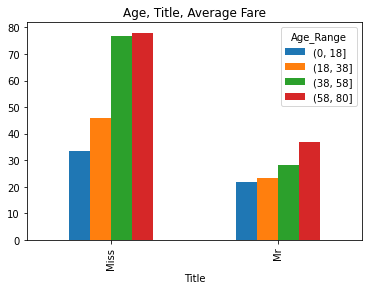

In [36]:
table_age_title_fare.plot(kind="bar",title= "Age, Title, Average Fare")

### 🚢Insight 2 - Embarked , `Cabin_Position` from Cabin , Survival
> Embarked Port: S- Southampton, C- Cherbourg, and Q- Queenstown. 
>
> Goal: We would like to know would the Port of Embarked and Cabin Position would matter with the survival rate
#### Conclusion⭐️
**<span style='background :#03CEA4' > People who embarked S port and located in C cabin have highest survival rate</span>**


In [37]:
# Data Cleasing ['Embarked']

titanic["Embarked"].describe() 
# Since we have total 891 passengers and Embarded only have 889
# we are going to use the most frequent value S Port to impute, because it is categorical varibale

titanic['Embarked']=titanic['Embarked'].fillna('S') # we fill it with Mode "S"


In [38]:
cabin_titanic = titanic.dropna(subset=["Cabin"]) # drop all the row that Null value in column ['Cabin']

cabin_titanic["Cabin_Position"]=cabin_titanic["Cabin"].str[0] # only get the First value of Cabin, as Cabin Position

cabin_survived=cabin_titanic.loc[cabin_titanic["Survived"]==1] # The number of people who survived in the cabin (136 out of 204 passengers)


<ipython-input-38-6155e9c0191e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_titanic["Cabin_Position"]=cabin_titanic["Cabin"].str[0] # only get the First value of Cabin, as Cabin Position


In [39]:
cabin_survived_chart = round(cabin_survived.groupby(["Embarked","Cabin_Position"]).agg({"Survived":"count"})/len(cabin_survived),3)
cabin_survived_chart

Survived
Embarked Cabin_Position          
C        A                  0.029
         B                  0.125
         C                  0.103
         D                  0.081
         E                  0.037
         F                  0.007
Q        C                  0.007
         E                  0.007
S        A                  0.022
         B                  0.132
         C                  0.147
         D                  0.103
         E                  0.132
         F                  0.051
         G                  0.015

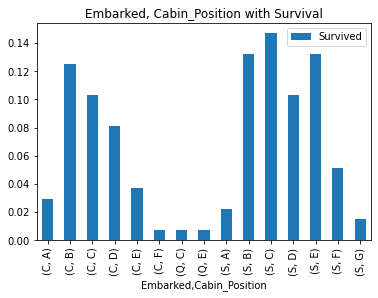

In [40]:
cabin_survived_chart = cabin_survived_chart.plot(kind="bar",title= "Embarked, Cabin_Position with Survival")

### 🚢Insight 3 - If Alone (From 'SibSp` and `Parch`)🕵🏻‍♂️ , Survive , Sex 
>
> We combine 'SibSp' and 'Parch' as Family size and create a new comlumn called IfAlone 
>
> Goal: To check if Different Gender being alone would affect their survival

#### Conclusion⭐️
**<span style='background :#03CEA4' > Men who is alone in Titanic are more likly to die</span>**

>>A male who traveled alone on the Titanic was 2.8x times more prone to dying (63% vs 22%), while females who were not alone were 2.0x times more likely to die (5% vs 10%). 

>>  From prior knowledge, we also knew that the female passenger survival rate was 5.6x higher than male passenger survival rate.


In [41]:
titanic["FamilySize"] = titanic["SibSp"]+ titanic["Parch"]
titanic["IfAlone"]="Alone" # if  alone
titanic.loc[titanic["FamilySize"]>0, "IfAlone"] = "Not Alone" #if not alone

In [42]:
titanic_death = titanic.loc[titanic["Survived"] == 0]
piv_death_alone= round(pd.pivot_table(
    data = titanic_death, 
    values = "Name",
    index= "IfAlone",
    columns = "Sex",
    aggfunc = "count")/len(titanic_death),2)
piv_death_alone

Sex,female,male
IfAlone,,
Alone,0.05,0.63
Not Alone,0.10,0.22


<AxesSubplot:title={'center':'IfAone, Gender with Survival '}, xlabel='IfAlone'>

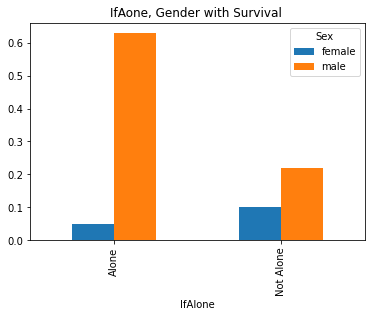

In [44]:
piv_death_alone.plot(kind="bar",title= "IfAone, Gender with Survival ")